In [1]:
import requests
import pandas as pd

In [9]:
def get_historic_price(symbol, exchange = 'bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange
        )
    resp = requests.get(url,params={
        'periods':'3600',
        'after':str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data=resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime','OpenPrice','HighPrice','LowPrice','ClosePrice','Volume','NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [10]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2021-10-27 13:59:42.029157')

In [11]:
btc = get_historic_price('btc','bitstamp',after=last_week)

In [12]:
eth = get_historic_price('eth','bitstamp',after=last_week)

In [13]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2021-10-27 14:00:00,59055.87,59360.08,58929.76,59059.28,110.466648,6.529886e+06
2021-10-27 15:00:00,59059.04,59518.03,58758.01,59199.04,96.032419,5.679354e+06
2021-10-27 16:00:00,59194.49,59395.69,58762.43,58851.28,153.148711,9.041247e+06
2021-10-27 17:00:00,58837.24,59088.64,58578.40,58913.76,103.850517,6.110943e+06
2021-10-27 18:00:00,58890.00,59210.39,58846.15,58949.22,70.683509,4.173706e+06


<AxesSubplot:xlabel='CloseTime'>

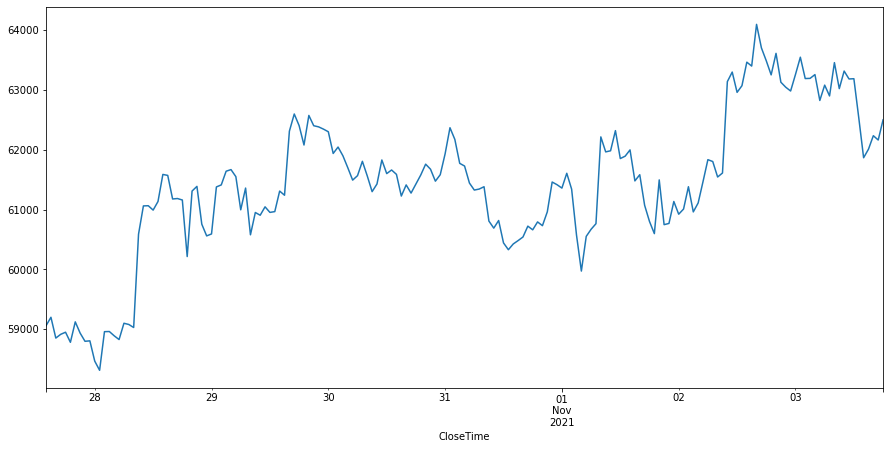

In [15]:
btc['ClosePrice'].plot(figsize=(15,7))

In [16]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2021-10-27 14:00:00,4011.34,4033.18,3991.33,3996.65,746.139179,2.993271e+06
2021-10-27 15:00:00,3996.65,4043.39,3967.54,4016.75,776.306804,3.111154e+06
2021-10-27 16:00:00,4015.10,4038.59,3986.93,3998.57,359.426533,1.440979e+06
2021-10-27 17:00:00,3995.72,4010.81,3953.32,3977.76,1328.494303,5.294491e+06
2021-10-27 18:00:00,3980.17,4007.40,3975.13,3990.50,676.627282,2.699199e+06


<AxesSubplot:xlabel='CloseTime'>

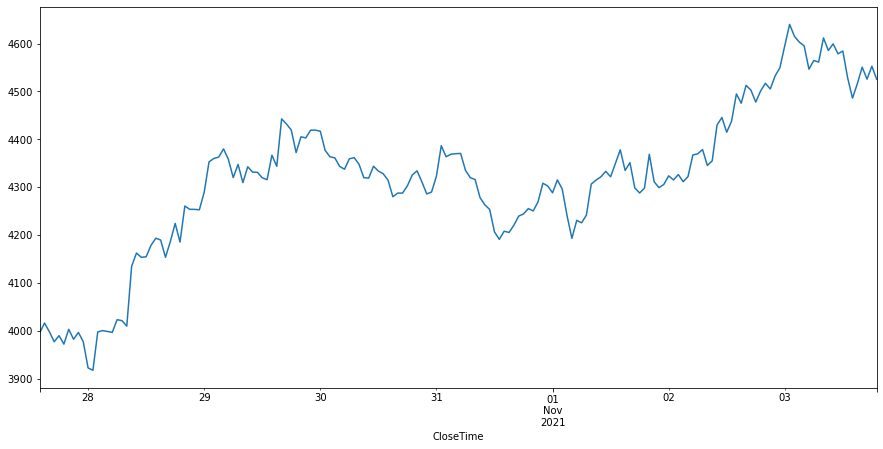

In [18]:
eth['ClosePrice'].plot(figsize=(15,7))

In [19]:
btc.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,173.000000,173.000000,173.000000,173.000000,173.000000,1.730000e+02
mean,61389.387803,61681.780925,61092.878266,61411.207283,110.864329,6.791716e+06
std,1235.372768,1209.700361,1292.963558,1223.713598,96.452921,5.842035e+06
min,58268.530000,58910.530000,56425.000000,58312.240000,22.113786,1.340272e+06
25%,60785.560000,61126.140000,60500.000000,60801.580000,53.623029,3.326496e+06
50%,61438.870000,61663.320000,61205.770000,61443.690000,87.227482,5.354482e+06
75%,62029.040000,62429.690000,61787.850000,62080.010000,128.504505,7.920032e+06
max,64092.250000,64300.000000,63628.150000,64097.430000,817.198710,4.828241e+07


In [20]:
writer = pd.ExcelWriter('cryptos.xlsx')

In [21]:
btc.to_excel(writer, sheet_name='Bitcoin')
eth.to_excel(writer, sheet_name='Ether')

In [22]:
writer.save()